<a href="https://colab.research.google.com/github/chunribu/manim4stats/blob/main/Manim_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manim社区版

- 当前版本：v0.15.2

- 官方网站：https://www.manim.community/

- 原作者：Grant Sanderson（3Blue1Browm）



## 安装

- 仅在colab中这样安装；

- 本地安装的话，根据自己的系统，按官方文档中的步骤安装

In [1]:
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file fonts-adf-accanthis fonts-adf-berenis
  fonts-adf-gillius fonts-adf-universalis fonts-cabin fonts-comfortaa
  fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-baskerville
  fonts-gfs-complutum fonts-gfs-didot fonts-gfs-neohellenic fonts-gfs-olga
  fonts-gfs-porson fonts-gfs-solomos fonts-go fonts-junicode fonts-lato
  fonts-linuxlibertine fonts-l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 13.1 MB/s 
     |████████████████████████████████| 381 kB 69.3 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: IPython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you

In [1]:
# 导入
from manim import *

Manim Community v0.15.2

## 基本用法

- 场景在`construct`方法中操作和控制

- 用`add`直接添加元素

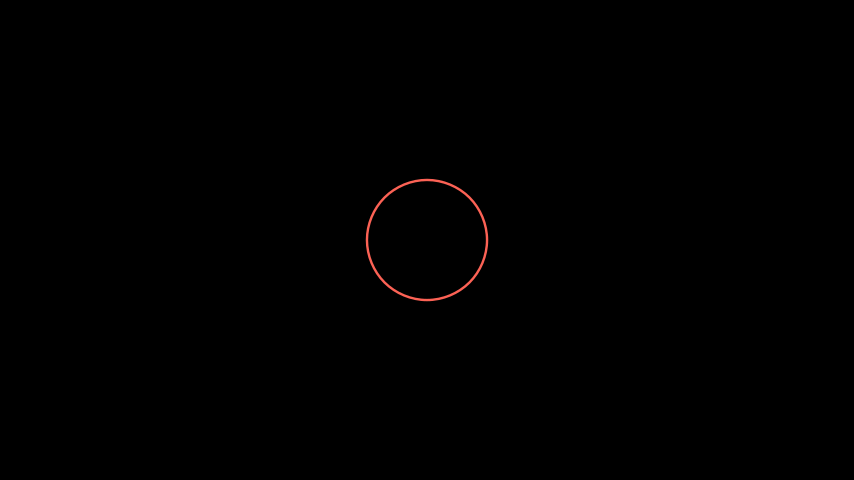

In [9]:
%%manim -ql -v WARNING View0

class View0(Scene):
    def construct(self):
      circle = Circle()
      self.add(circle)

- 用`play`添加动画

In [10]:
%%manim -ql -v WARNING View1

class View1(Scene):
    def construct(self):
        circle = Circle()
        self.play(Create(circle))
        self.wait()

## 位置控制

- `shift`
- `move_to`
- `next_to`
- `align_to`

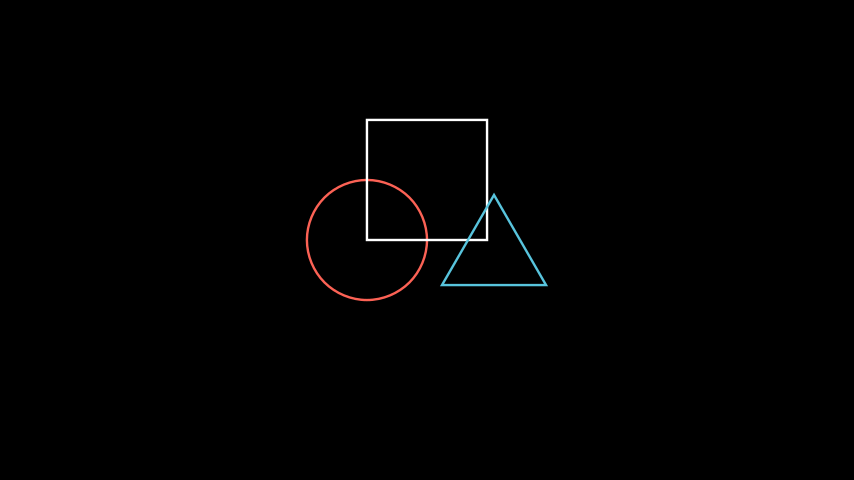

In [11]:
%%manim -ql -v WARNING View2

class View2(Scene):
    def construct(self):
        circle = Circle()
        triangle = Triangle()
        square = Square()

        circle.shift(LEFT)
        triangle.next_to(circle, RIGHT)
        square.move_to([0,1,0])

        self.add(circle, square, triangle)

小技巧：先添加坐标系，最后渲染视频的时候再删掉

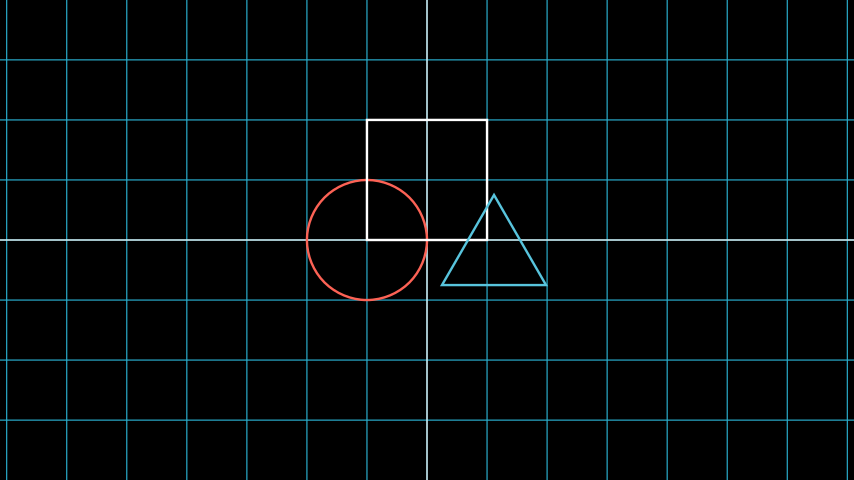

In [12]:
%%manim -ql -v WARNING View3

class View3(Scene):
    def construct(self):
        self.add(NumberPlane())

        circle = Circle()
        triangle = Triangle()
        square = Square()

        circle.shift(LEFT)
        triangle.next_to(circle, RIGHT)
        square.move_to([0,1,0])

        self.add(circle, square, triangle)

## 添加动画

两种方式：

- 调用元素的`animate`方法
- 全局对象

In [13]:
%%manim -ql -v WARNING View4

class View4(Scene):
    def construct(self):
        circle = Circle()
        triangle = Triangle()
        square = Square()

        self.play(circle.animate.shift(LEFT))
        self.play(triangle.animate.next_to(circle, RIGHT))
        self.play(square.animate.move_to([0,1,0]))

        vg = VGroup(circle, triangle, square)
        self.play(FadeOut(vg))
        self.wait()

与数据联动：
- 借助`ValueTracker`

In [14]:
%%manim -ql -v WARNING View5

class View5(Scene):
    def construct(self):
        number_line = NumberLine(include_numbers=True)
        pointer = Vector(DOWN)
        tracker = ValueTracker(0)

        pointer.add_updater(
            lambda m: m.next_to(number_line.n2p(tracker.get_value()), UP)
        )

        self.add(number_line, pointer)
        self.play(tracker.animate.set_value(5))
        self.wait()